The following mini-project aims to create the most basic Neural Network (without any hypertuning parameters and fancy techniques) using Functional API. The code can be used to build up on and improve the model or to simply learn the basics of how Neural Networks operate.

The goal is to classify different types of wine. Let's start by downloading the dataset:

In [ ]:
!wget https://storage.googleapis.com/nicksdemobucket/wines.csv

--2022-03-14 19:01:42--  https://storage.googleapis.com/nicksdemobucket/wines.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10957 (11K) [application/octet-stream]
Saving to: ‘wines.csv.7’

wines.csv.7         100%[===================>]  10.70K  --.-KB/s    in 0s      

2022-03-14 19:01:42 (44.9 MB/s) - ‘wines.csv.7’ saved [10957/10957]



Pre-Processing stage:

Checking the data that we are going to work with. Observations under 'Class' column are our target variable.

In [ ]:
import pandas as pd
df = pd.read_csv('wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Importing TensorFlow and Keras API for Neural Network:

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.8.0'

Changing the class range from 1-3 to 0-2. This is important for the Network to work:

In [ ]:
df['Class'] = df['Class'].apply(lambda x: 0 if x==1 else (1 if x==2 else 2))

In [ ]:
df["Class"].value_counts()

1    71
0    59
2    48
Name: Class, dtype: int64

Defining a target variable, converting it to an array and standardizing it:

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']

In [ ]:
def convert_to_array(input):
  result = input.to_numpy()
  return result

Xr = convert_to_array(X)
yr = convert_to_array(y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(Xr)

Using Keras to create a Neural Network:

Here, we employ 2 hidden layers. Number 3 in the output layer stands for 3 classes that we will classify the wine in. Numbers in the hidden layers can be modified depending on the preference:

In [ ]:
input_ = keras.layers.Input(shape=X_std.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
output = keras.layers.Dense(3, activation = "softmax")(hidden2) 

model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 3)                 93        
                                                                 
Total params: 1,443
Trainable params: 1,443
Non-trainable params: 0
_________________________________________________________________


Since we are using set categories, categorical crossenthropy is a better option as opposed to using MSE for compiling

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=["accuracy"])

both epochs and validation split (train-test split) are arbitrary and affect the variables we see in history:

In [ ]:
history = model.fit(X_std, yr, epochs=25, validation_split = 0.3)

Epoch 1/25
4/4 [==============================] - 1s 186ms/step - loss: 1.0588 - accuracy: 0.3952 - val_loss: 0.9479 - val_accuracy: 0.6481
Epoch 2/25
4/4 [==============================] - 0s 26ms/step - loss: 0.9996 - accuracy: 0.4919 - val_loss: 0.9848 - val_accuracy: 0.5370
Epoch 3/25
4/4 [==============================] - 0s 22ms/step - loss: 0.9457 - accuracy: 0.6290 - val_loss: 1.0220 - val_accuracy: 0.4815
Epoch 4/25
4/4 [==============================] - 0s 23ms/step - loss: 0.8946 - accuracy: 0.7097 - val_loss: 1.0593 - val_accuracy: 0.3519
Epoch 5/25
4/4 [==============================] - 0s 25ms/step - loss: 0.8476 - accuracy: 0.7742 - val_loss: 1.0959 - val_accuracy: 0.2037
Epoch 6/25
4/4 [==============================] - 0s 19ms/step - loss: 0.8042 - accuracy: 0.8306 - val_loss: 1.1323 - val_accuracy: 0.1852
Epoch 7/25
4/4 [==============================] - 0s 21ms/step - loss: 0.7624 - accuracy: 0.8629 - val_loss: 1.1690 - val_accuracy: 0.0926
Epoch 8/25
4/4 [==========

This is the visual representation of the neural network we created:

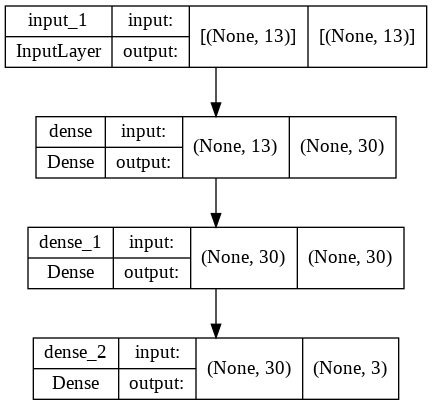

In [ ]:
keras.utils.plot_model(model, "test.png", show_shapes=True)

In [ ]:
history.params


{'epochs': 25, 'steps': 4, 'verbose': 1}

In [ ]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Finally, this is the visual representation of the performance of the Neural Network. Ideally, we want loss to keep going down with each consecutive epoch we use. Obviously, it is good for accuracy to be at a high level as well:

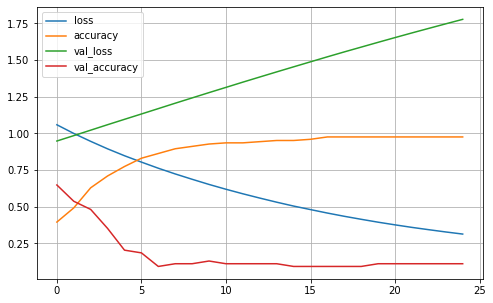

In [ ]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

Thank you!